In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Importing the CSV files

This CSV file is available on [Iran`s dataset in World bank](https://www.worldbank.org/en/country/iran) and [Turkey`s dataset](https://www.worldbank.org/en/country/turkey) in the same website . I cleaned this data using LibreOffice and kept the important rows to prevent complexity in my code. 

In [2]:
# Importing Iran`s dataset 
IRAN_SOURCE_FILE = 'iran_emission_dataset.csv'
iran_csv = pd.read_csv(IRAN_SOURCE_FILE)
iran_csv.head(5)


,Iran,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,CO2 emissions from gaseous fuel consumption (kt),1840.834,1903.173,2038.852,2207.534,2310.210,2379.883,2684.244,2841.925,3039.943,...,236712.184,250100.401,262216.169,277448.887,293510.347,291482.496,295175.165,NaN,NaN,NaN
1,CO2 emissions from liquid fuel consumption (kt),21855.320,19339.758,18723.702,20289.511,23589.811,24645.907,26329.060,27630.845,36530.654,...,266942.932,271479.011,269322.815,259905.959,253983.754,278581.990,246620.418,NaN,NaN,NaN
2,CO2 emissions from solid fuel consumption (kt),612.389,524.381,542.716,605.055,726.066,755.402,755.402,770.070,788.405,...,6582.265,5863.533,4396.733,5452.829,5317.150,4129.042,4253.720,NaN,NaN,NaN


In [3]:
# Importing Turkey`s dataset
TURKEY_SOURCE_FILE = 'turkey_emission_dataset.csv'
turkey_csv = pd.read_csv(TURKEY_SOURCE_FILE)
turkey_csv.head(5)

,Turkey,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,CO2 emissions from gaseous fuel consumption (kt),0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,69680.334,69152.286,66229.687,71906.203,84256.659,85342.091,86013.152,NaN,NaN,NaN
1,CO2 emissions from liquid fuel consumption (kt),4473.74,5720.520,8566.112,8353.426,10498.621,11536.382,13732.915,16362.154,18610.025,...,76464.284,74539.109,68074.188,70428.402,74524.441,76948.328,76145.255,NaN,NaN,NaN
2,CO2 emissions from solid fuel consumption (kt),11331.03,10630.633,11906.749,12970.179,14370.973,14194.957,15885.444,15045.701,15350.062,...,113798.011,114634.087,116621.601,124377.306,130435.190,135411.309,125708.427,NaN,NaN,NaN


As I wanted the emission types be my coloumns and the years be the rows, I used `transpose()` function. Some data was missing for the last three years which I substituded their value by zero.

In [4]:
iran_csv = iran_csv.transpose()
iran_csv = iran_csv.fillna(0)
iran_csv.columns = iran_csv.ix[0,:]
iran_csv = iran_csv.ix[1:,:] 
iran_csv.astype(np.float64)
iran_csv.head(5)

Iran,CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from solid fuel consumption (kt)
1960,1840.83,21855.3,612.389
1961,1903.17,19339.8,524.381
1962,2038.85,18723.7,542.716
1963,2207.53,20289.5,605.055
1964,2310.21,23589.8,726.066


In [5]:
turkey_csv = turkey_csv.transpose()
turkey_csv = turkey_csv.fillna(0)
turkey_csv.columns = turkey_csv.ix[0,:]
turkey_csv = turkey_csv.ix[1:,:] 
turkey_csv.astype(np.float64)
turkey_csv.head(5)

Turkey,CO2 emissions from gaseous fuel consumption (kt),CO2 emissions from liquid fuel consumption (kt),CO2 emissions from solid fuel consumption (kt)
1960,0,4473.74,11331
1961,0,5720.52,10630.6
1962,0,8566.11,11906.7
1963,0,8353.43,12970.2
1964,0,10498.6,14371


# Distribution plot for CO2 emssions from liquid fuel consumption


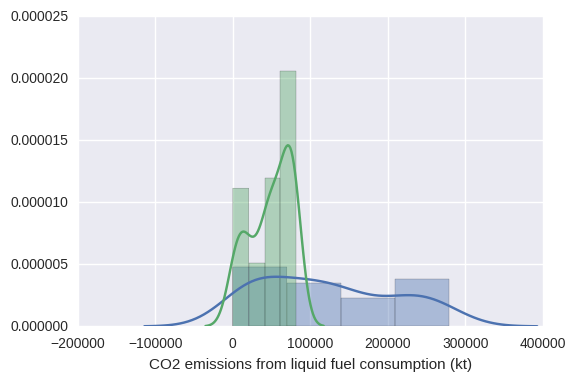

In [6]:
#Iran (Blue)
sns.distplot(iran_csv.ix[:,1])

#Turkey (Green)
sns.distplot(turkey_csv.ix[:,1])


 # Joint plot for CO2 emissions from solid fuel consumption in Iran and Turkey
 As there were no values for the gaseous column before 1978, I preferred to present my data using solid fuel emission values instead.

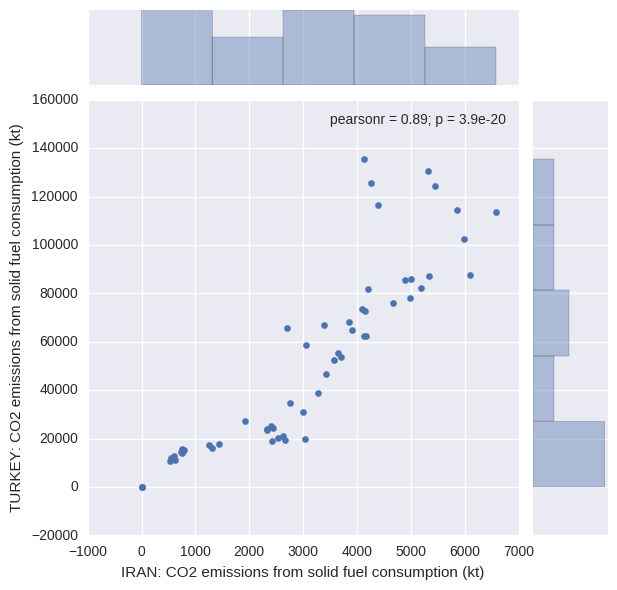

In [8]:
SOLID_FUEL_COLUMN_INDEX = 2
a = sns.jointplot(iran_csv.ix[:,SOLID_FUEL_COLUMN_INDEX],
              turkey_csv.ix[:,SOLID_FUEL_COLUMN_INDEX]).set_axis_labels(
    "IRAN: " + iran_csv.columns[SOLID_FUEL_COLUMN_INDEX], 
    "TURKEY: " + turkey_csv.columns[SOLID_FUEL_COLUMN_INDEX])
a.savefig("output.png")

# Conclusion

 In these graphs I visualised Iran's and Turkey's datasets of CO2 emmision from various sources by going through these steps: 
 
 - I cleaned these datasets and kept the important rows 
 - I altered the missing data values with zero
 - The last graph shows that since 1978 to 2013 Iran has made more polution from solid fuels than Turkey.
